In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/praktikum_ml/praktikum06'

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [21]:
df = pd.read_csv(path + '/data/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
df['pass'] = df['G3'] >= 10
df['pass'] = df['pass'].astype(int)

In [12]:
X = df[['G1', 'G2', 'absences', 'studytime', 'failures']]

In [13]:
y = df['pass']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)



SVC(kernel='linear')

In [15]:
y_pred = model.predict(X_test)

##akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

##laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))



Akurasi: 88.61%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.94      0.88      0.91        52

    accuracy                           0.89        79
   macro avg       0.87      0.89      0.88        79
weighted avg       0.89      0.89      0.89        79



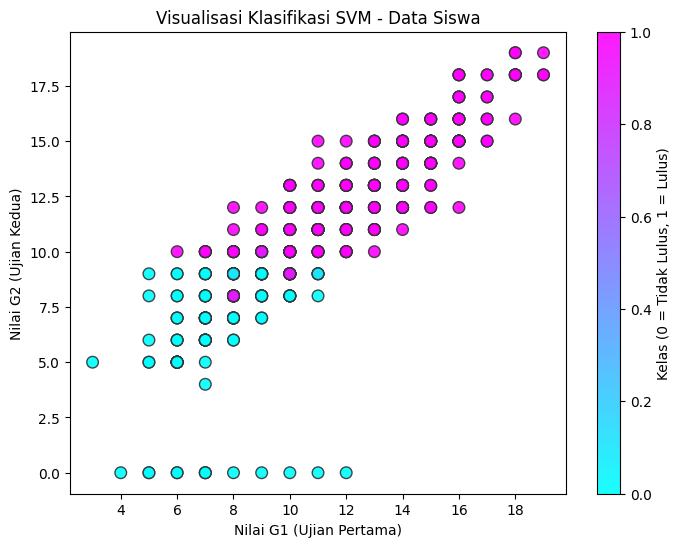

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['G1'], df['G2'], c=df['pass'], cmap='cool', edgecolors='#333', s=70, alpha=0.9)

plt.xlabel('Nilai G1 (Ujian Pertama)')
plt.ylabel('Nilai G2 (Ujian Kedua)')
plt.title('Visualisasi Klasifikasi SVM - Data Siswa')
plt.colorbar(label='Kelas (0 = Tidak Lulus, 1 = Lulus)')
plt.show()

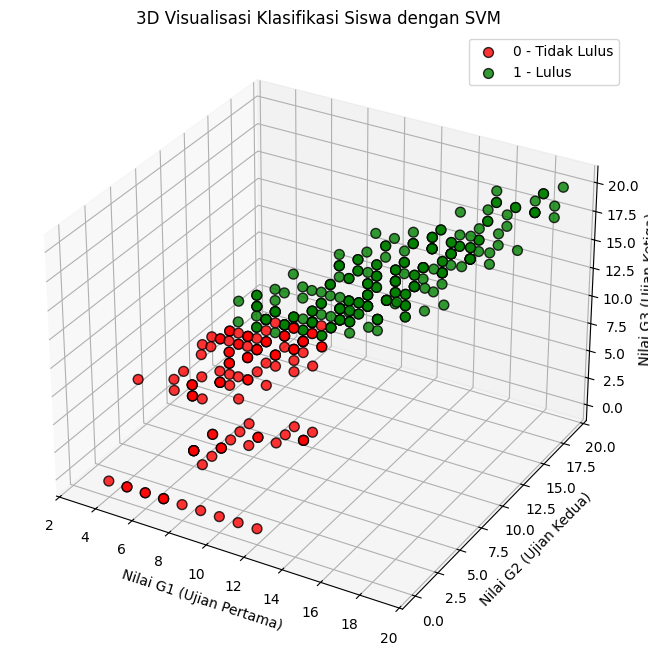

In [18]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Encode label pass (0 atau 1)
le = LabelEncoder()
df['passEncoded'] = le.fit_transform(df['pass'])

# Buat figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g']  # 0 = merah (Tidak Lulus), 1 = hijau (Lulus)
labels = le.classes_

# Plot tiap kelas dengan warna berbeda
for i, label in enumerate(labels):
    subset = df[df['passEncoded'] == i]
    ax.scatter(
        subset['G1'],
        subset['G2'],
        subset['G3'],  # sumbu Z
        color=colors[i],
        label=f'{label} - {"Lulus" if label==1 else "Tidak Lulus"}',
        s=50,
        alpha=0.8,
        edgecolors='k'
    )

ax.set_xlabel('Nilai G1 (Ujian Pertama)')
ax.set_ylabel('Nilai G2 (Ujian Kedua)')
ax.set_zlabel('Nilai G3 (Ujian Ketiga)')
ax.set_title('3D Visualisasi Klasifikasi Siswa dengan SVM')
ax.legend()
plt.show()
